# Data Science Project: Joshua Gordon *332307073*

## part one: Classification model

##### goals:
* ***importing and anaylizing data, understanding what we are working with***
* ***data cleaning***
* ***spliting the data to test and train sets***
* ***maximizing our models accuracy***

#### *importing and anaylizing data, understanding what we are working with*

In [538]:
import pandas as pd

df_2019 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2019.csv')

df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### We have managed to import our dataset of world happines report 2019

#### After importing our data I have stummbled across another 5 data sets from previose years (2015 - 2018).
#### We shall import all these five data sets and proced to clean the data one data set at a time in order to hopfully merge all the data sets

In [539]:
df_2019['year'] = 2019

cols_lst = ['Overall rank', 'Country or region', 'Score', 'GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'year']

df_2019.columns = cols_lst

df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


#### *We shall add a column for each dataset with the year the data was recorded. we shall then try build a classifiction modle* 
#### *that will correctly prredict the year of a given data sample.*

#### *An imortant part of the data cleaning prossess is to make sure all 5 datasets have the same headings we there for shall drop heading that are unique and keep only the headings and data that all 5 data sets share.

In [540]:
df_2018 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2018.csv')
df_2018['year'] = 2018

df_2018.columns = cols_lst

df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [541]:
df_2017 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2017.csv')


df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


#### *We can clearly see here that we have irrelivant data that is not shared with our previouse data sets. we shall there for drop them as they are irrelivant for oour task at hand*

In [542]:
df_2017['year'] = 2017
df_2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1, inplace=True)

temp_lst = list(df_2017)


col_Titles=["Happiness.Rank","Country"] + temp_lst[2:]


df_2017=df_2017.reindex(columns=col_Titles)

df_2017.columns = cols_lst

df_2017.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [543]:
df_2016 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2016.csv')

df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


#### *We can clearly see here that we have irrelivant data that is not shared with our previouse data sets. we shall there for drop them as they are irrelivant for oour task at hand*

In [544]:
df_2016['year'] = 2016
df_2016.drop(['Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual','Region'] ,axis = 1,inplace=True)

temp_lst = list(df_2016)

col_Titles = ["Happiness Rank","Country"] + temp_lst[2:]

df_2016 = df_2016.reindex(columns=col_Titles)
df_2016.columns = cols_lst

df_2016.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,2,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,3,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,4,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,5,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [545]:
df_2015 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2015.csv')

df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### *We can clearly see here that we have irrelivant data that is not shared with our previouse data sets. we shall there for drop them as they are irrelivant for oour task at hand*

In [546]:
df_2015['year'] = 2015
lst = list(df_2015)
df_2015.drop([lst[1], lst[4], lst[-2]], axis = 1, inplace=True)

lst = list(df_2015)
col_Titles = ["Happiness Rank", "Country"] + lst[2:]

df_2015 = df_2015.reindex(columns=col_Titles)
df_2015.columns = cols_lst

df_2015.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


## data cleaning

#### *We have successfuly manged to import and clean our 5 data sets in order to merge the data sets in to one big data frame*

In [581]:
all_years_data = [df_2019, df_2018, df_2017, df_2016, df_2015]

df = pd.concat(all_years_data)

df.head(780)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.34000,1.58700,0.98600,0.59600,0.15300,0.39300,2019
1,2,Denmark,7.600,1.38300,1.57300,0.99600,0.59200,0.25200,0.41000,2019
2,3,Norway,7.554,1.48800,1.58200,1.02800,0.60300,0.27100,0.34100,2019
3,4,Iceland,7.494,1.38000,1.62400,1.02600,0.59100,0.35400,0.11800,2019
4,5,Netherlands,7.488,1.39600,1.52200,0.99900,0.55700,0.32200,0.29800,2019
...,...,...,...,...,...,...,...,...,...,...
151,152,Burkina Faso,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,2015
152,153,Afghanistan,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,2015
153,154,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,2015
154,155,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,2015


In [582]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.178526,0.165536,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.119115,0.127410,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.084860,0.067860,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.155219,0.128000,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.246864,0.236930,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.819710,2019.000000


#### *We have merged the data and got a quick description of our new 5 in 1 data set*

In [583]:
df.isnull().sum()
#checking to see which values are null

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
year                            0
dtype: int64

#### Checking for null values as this could mess around later on when we try and make a modle

In [584]:
df['Perceptions of corruption'] = df['Perceptions of corruption'].fillna(0)

#### ***fillling missing values***

In [585]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
year                            0
dtype: int64

#### Fixing the null values and double checking see have corrected the data

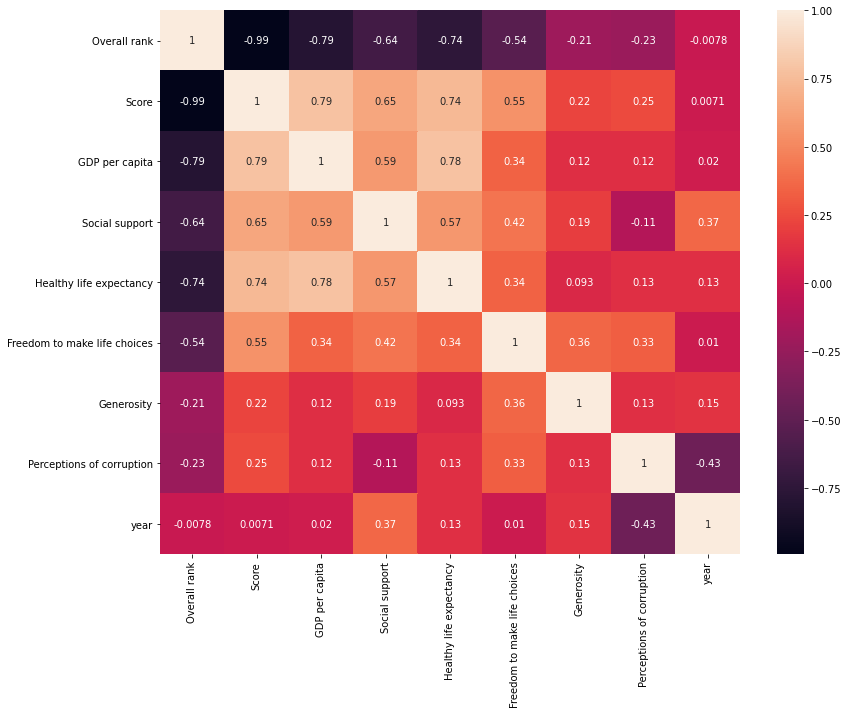

In [586]:
import seaborn as sns
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot = True);

# Important Analiysis

* ***Let us notic that our countrys have not shown up in the correlation graph as they are objects of the type String and we would need to manually make them in to numric values***

### ***most importantly we shall notice that there is a weak correlation between the feature year and the other features. We can there for expect for our modle to have a lower accuracy score than if the features were highly correlated***

# spliting the data to test and train sets

In [587]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['year']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)


score = classifier.score(X_test, y_test)
print(score)

0.10191082802547771


## ***We have imported our clasifier model and split our data in to training and testing sets using the standard 20/80 split. We then defined a clasifier of the type KNN and fitted our modle with our training sets using the standard 5 knn***

### We used our score metric on the test sets and our classifier scores with around 10.19% accuracy

## this isnt supprising right? I mean we knew from the corrolation heatmap that our classifier's accuracy woudnt be as high due to the correlation of the features. But its still worth somthing right? I mean all this hard work it has to be worth somthing and 10.19% isnt that bad right?

# WRONG!

### let me explain.

## ***I would like to introduce our dummy clasifier***

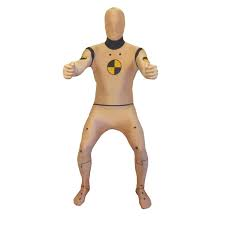

### *A dummy clasifier is a benchmark that if not passed we could all agree that our model is usless.*

## ***Lets clarify our dummy clasifier***

### We can say our clasifier is trying to predict a given year OUT OF 5 years. Meaing there are 5 options and no more than 5. We can therefor say that a "Dummy classifier" has a 0.2 chance of gussing the right answer. In othere words anything below 20% is usless as any "Dummy" could randomly gusse and produce better results.

### therefor we come to a conclusion that our model (for the moment is usless)

In [588]:
countrys = list(df['Country or region'].unique())

nums = list(range(1,len(countrys)))


dic = dict(zip(countrys, nums))

print(dic)

{'Finland': 1, 'Denmark': 2, 'Norway': 3, 'Iceland': 4, 'Netherlands': 5, 'Switzerland': 6, 'Sweden': 7, 'New Zealand': 8, 'Canada': 9, 'Austria': 10, 'Australia': 11, 'Costa Rica': 12, 'Israel': 13, 'Luxembourg': 14, 'United Kingdom': 15, 'Ireland': 16, 'Germany': 17, 'Belgium': 18, 'United States': 19, 'Czech Republic': 20, 'United Arab Emirates': 21, 'Malta': 22, 'Mexico': 23, 'France': 24, 'Taiwan': 25, 'Chile': 26, 'Guatemala': 27, 'Saudi Arabia': 28, 'Qatar': 29, 'Spain': 30, 'Panama': 31, 'Brazil': 32, 'Uruguay': 33, 'Singapore': 34, 'El Salvador': 35, 'Italy': 36, 'Bahrain': 37, 'Slovakia': 38, 'Trinidad & Tobago': 39, 'Poland': 40, 'Uzbekistan': 41, 'Lithuania': 42, 'Colombia': 43, 'Slovenia': 44, 'Nicaragua': 45, 'Kosovo': 46, 'Argentina': 47, 'Romania': 48, 'Cyprus': 49, 'Ecuador': 50, 'Kuwait': 51, 'Thailand': 52, 'Latvia': 53, 'South Korea': 54, 'Estonia': 55, 'Jamaica': 56, 'Mauritius': 57, 'Japan': 58, 'Honduras': 59, 'Kazakhstan': 60, 'Bolivia': 61, 'Hungary': 62, 'Para

### ***let us try improve our modle by adding the countrys, above we have made two lists: one of countrys and the other of numbers 1 - 169 representing all the countrys***

In [589]:
df['Country of region to num'] = df['Country or region'].map(dic)
df.head(1000)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Country of region to num
0,1,Finland,7.769,1.34000,1.58700,0.98600,0.59600,0.15300,0.39300,2019,1.0
1,2,Denmark,7.600,1.38300,1.57300,0.99600,0.59200,0.25200,0.41000,2019,2.0
2,3,Norway,7.554,1.48800,1.58200,1.02800,0.60300,0.27100,0.34100,2019,3.0
3,4,Iceland,7.494,1.38000,1.62400,1.02600,0.59100,0.35400,0.11800,2019,4.0
4,5,Netherlands,7.488,1.39600,1.52200,0.99900,0.55700,0.32200,0.29800,2019,5.0
...,...,...,...,...,...,...,...,...,...,...,...
153,154,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,2015,152.0
154,155,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,2015,102.0
155,156,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,2015,149.0
156,157,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,2015,145.0


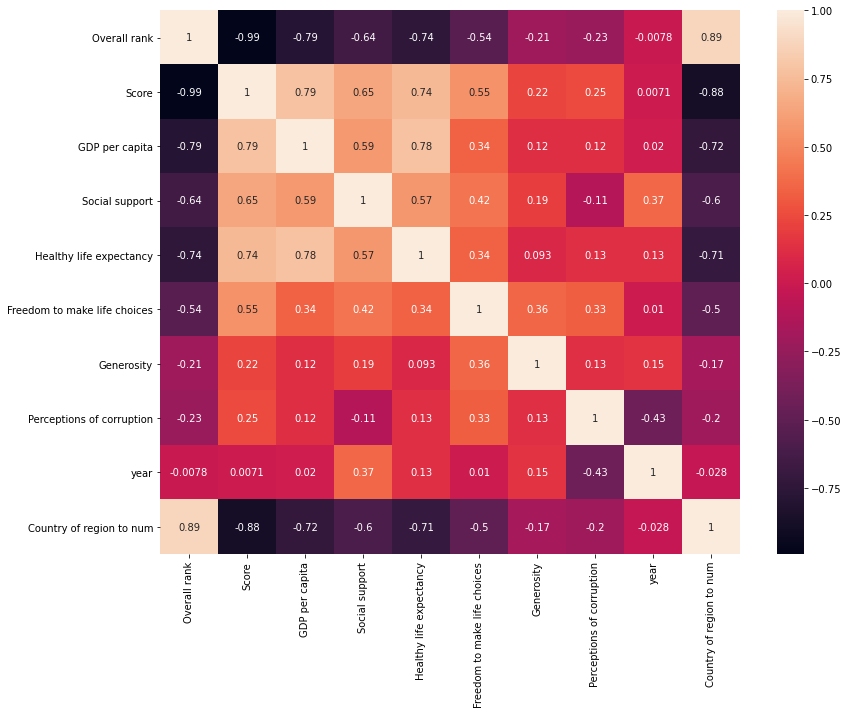

In [590]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot = True);

## ***Here we can see that our countrys of region to num has been inserted to our correlation heatmap***

In [591]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
year                            0
Country of region to num        1
dtype: int64

In [592]:
df['Country of region to num'] = df['Country of region to num'].fillna(0)
#fillling missing values

#### filling null values to ensure our data stays clean and workable

In [593]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption','Country of region to num']]
y = df['year']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print(score)


0.2356687898089172


## ***well above we can see that we have inproved our classifier by over 10%! and we have now past our dummy clasifier meaning we are not usless! YAY :)***

#### lets see what test size would give us the best accuracy score! so we can improve our 23.5%

In [594]:
lst_max_test_size = []
for i in np.arange(0.1,1,0.01):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state = 0)

    classifier = KNeighborsClassifier(n_neighbors = 5)

    classifier.fit(X_train, y_train)

    score = classifier.score(X_test, y_test)
    
    lst_max_test_size.append(score)


### Above we have performed a loop starting from a test size of 10% and moving up 1% each new classifer, all our score results have been appended to a list

Text(0.5, 1.0, 'accuracy as a function of test size')

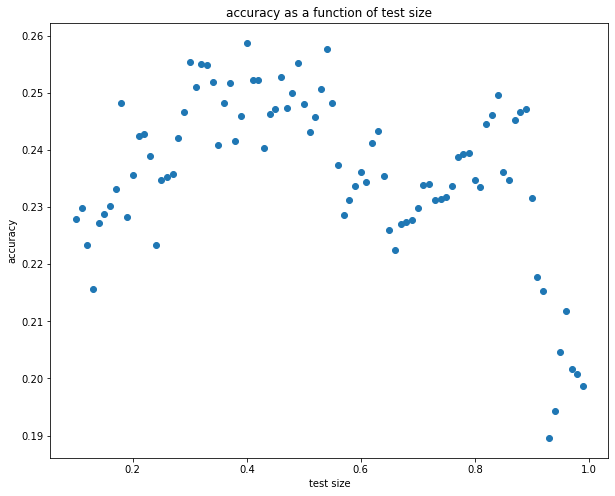

In [595]:
plt.figure(figsize=(10,8))

plt.scatter(np.arange(0.1,1,0.01),lst_max_test_size)
plt.xlabel("test size")
plt.ylabel("accuracy")
plt.title("accuracy as a function of test size")

#### Good work so far. we have ploted a graph showing all the results from our loops we an clearly see that at a test size of 40% (0.4 on the graph) we will revice the maximin resluts

In [596]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption','Country of region to num']]
y = df['year']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print(score)


0.25878594249201275


### Boom! from 23.56% to 25.87% thats a nice increase. let us try ajjust our k value for our KNN in order to maximize even more our clasifier

In [597]:
lst_max_knn = []
for i in np.arange(1,50):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

    classifier = KNeighborsClassifier(n_neighbors = i)

    classifier.fit(X_train, y_train)

    score = classifier.score(X_test, y_test)
    
    lst_max_knn.append(score)


### ***Above we have yet again loops this time for 50 times and split the data with a 40/60 split test (As we saw this gives us the best results) only this time each loop the number of neigbors will be ajusted from 1 to 50. the results will be stored in a list and we will see the best KNN for our model***

Text(0.5, 1.0, 'accuracy as a function of KNN')

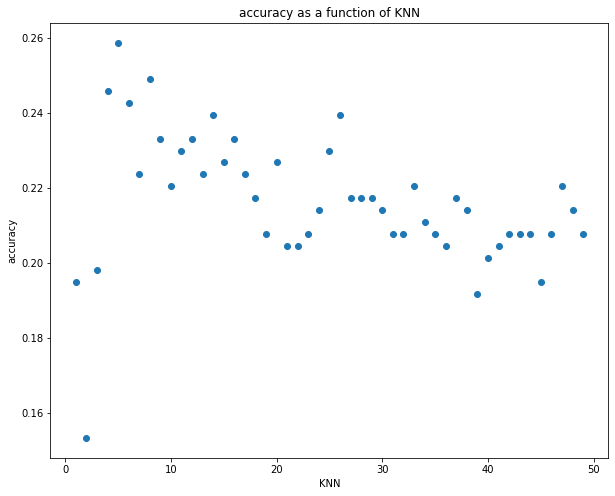

In [598]:
plt.figure(figsize=(10,8))

plt.scatter(np.arange(1,50),lst_max_knn)
plt.xlabel("KNN")
plt.ylabel("accuracy")
plt.title("accuracy as a function of KNN")

In [599]:
max_value = 0
kkn_ks = 0
count = 0
for knn_score in  lst_max_knn:
    if(knn_score > max_value):
        max_value = knn_score
        knn_ks = count + 1
    count+=1
        
print(max_value)
print(knn_ks)

0.25878594249201275
5


### We can see from our plotted graph that our best number of neigbors is 5 wich is what we had previously

In [600]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print(score)

0.25878594249201275


###  ***Below we are going todo a K cross validation*** 

#### This will help us make sure our model is reliable

In [601]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 10, shuffle = False)
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=folds)
scores.mean()

0.24949121184088807

In [602]:
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=folds)
scores 

array([0.20212766, 0.21276596, 0.25531915, 0.25531915, 0.33333333])

In [603]:
scores.mean()

0.25177304964539005

#### Above we have tryed a 5 flod and 10 flod validation as we can see it is better for us to use 5 in this case and we confirm our modle is reliable with an average of 25.17% accuracy

## is there a problem with how we have built our model? below i shall explain.

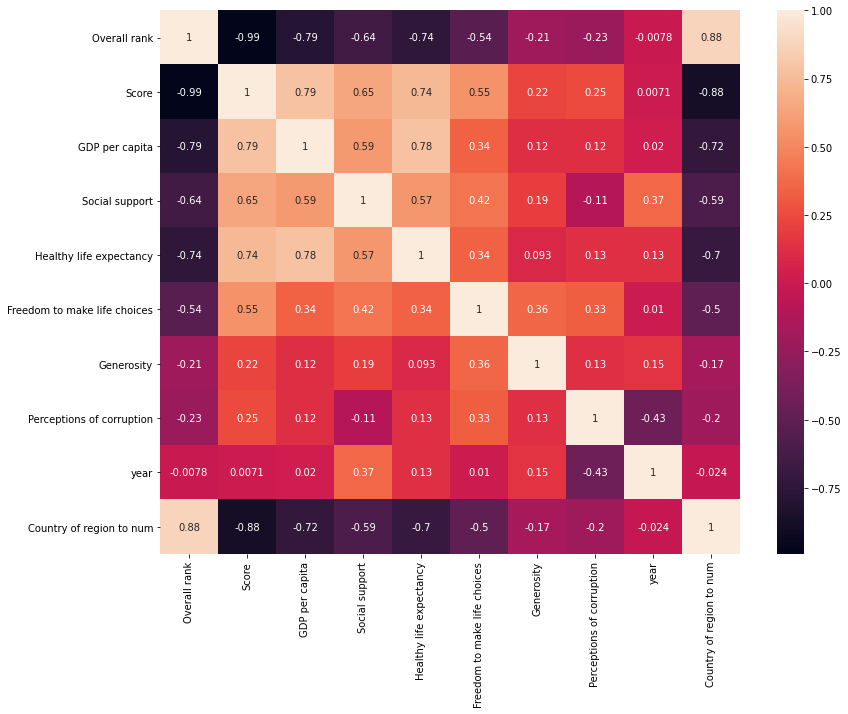

In [604]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot = True);

In [605]:

df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Country of region to num
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,1.0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,2.0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,3.0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,4.0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,5.0


## Above is our correlation heat map as well as the head of our 5 in 1 data frame.

## looking at the year column it seems the years are much bigger number wise inregards to other features. could this be messing around with our model?


# lets manually normilize the year feature and instead of using big year numbers we will replace it with 1,2,3,4,5 instead of 2015,2016,2017,2018,2019

In [606]:
df['year'].replace({2015: 1, 2016: 2, 2017: 3, 2018: 4 , 2019:5}, inplace=True)


In [610]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Country of region to num
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,5,1.0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,5,2.0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,5,3.0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,5,4.0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,5,5.0


## ***We can see the years have been changed and if there was a problem before because of the big numbers it should now be less of an issue***

In [611]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption','Country of region to num']]
y = df['year']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print(score)

0.25878594249201275


# 25.87%

## This is the same that we got befor meaning that we do not have a problem with the numbers and there was no need to manually normalize. however it is good that we double checked

In [613]:
df['year'].replace({1: 2015, 2:2016, 3:2017, 4:2018 , 5:2019}, inplace=True)

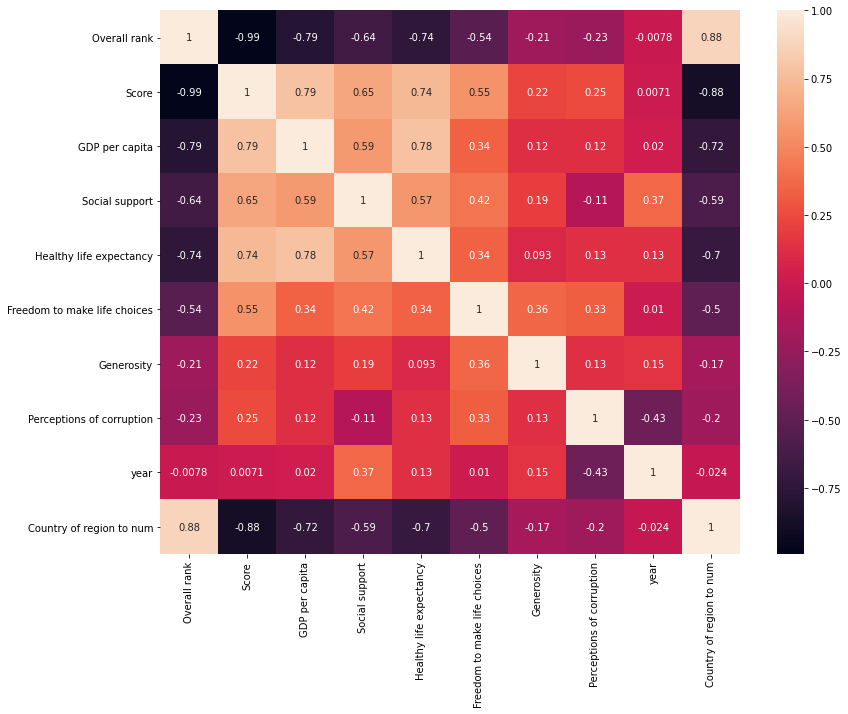

In [614]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot = True);

## ***Above we can se that social support is highly correlated with the year, therefor lets try run a quick modle with ONLY these two features***

In [478]:
X = df[['Social support']]
y = df['year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print(score)

0.2971246006389776


#### Above we can see we have a 29.71% wich is higher than our current classifier 

# End of Classification

# Regresion Model

## part two: Classification model

##### goals:
* ***importing and anaylizing data, understanding what we are working with***
* ***data cleaning***
* ***spliting the data to test and train sets***
* ***maximizing our models accuracy***

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df_students = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (2)\StudentsPerformance.csv')
df_students.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df_students.info


<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

# We shall drop race/ethnicity as we have no idea what this means (The publisher of this dataset also could not give any insight)

In [7]:
temp_lst = list(df_students)
df_students.drop([temp_lst[1]], axis=1, inplace=True)
df_students.head(5)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,standard,none,72,72,74
1,female,some college,standard,completed,69,90,88
2,female,master's degree,standard,none,90,95,93
3,male,associate's degree,free/reduced,none,47,57,44
4,male,some college,standard,none,76,78,75


## ***Let us see the correlation heatmap***

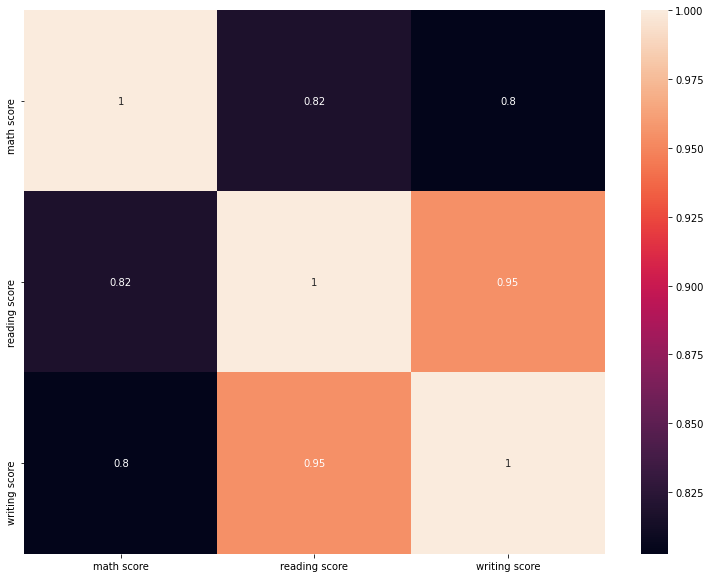

In [8]:
plt.figure(figsize=(13, 10))
sns.heatmap(df_students.corr(), annot = True);

## it seems like our correlations can only indentify the scores, we will have to manually change data to numrical values.

In [9]:
df_students['male'] = df_students.gender.map({'female':0, 'male':1})
df_students.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,male
0,female,bachelor's degree,standard,none,72,72,74,0
1,female,some college,standard,completed,69,90,88,0
2,female,master's degree,standard,none,90,95,93,0
3,male,associate's degree,free/reduced,none,47,57,44,1
4,male,some college,standard,none,76,78,75,1


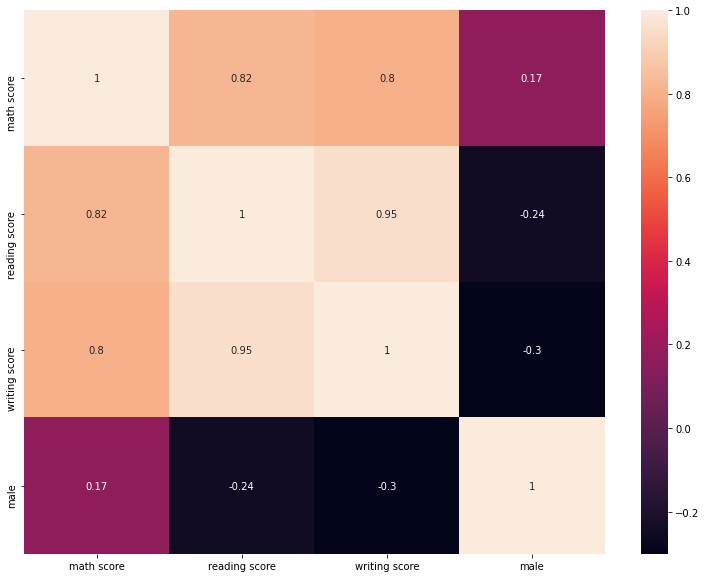

In [10]:
plt.figure(figsize=(13, 10))
sns.heatmap(df_students.corr(), annot = True);



In [11]:
df_students.head(10)
df_students.groupby(['lunch']).count()


,gender,parental level of education,test preparation course,math score,reading score,writing score,male
lunch,,,,,,,
free/reduced,355,355,355,355,355,355,355
standard,645,645,645,645,645,645,645


In [12]:

df_students['lunch_cost'] = df_students.lunch.map({'standard':1, 'free/reduced':0})
df_students.head(5)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,male,lunch_cost
0,female,bachelor's degree,standard,none,72,72,74,0,1
1,female,some college,standard,completed,69,90,88,0,1
2,female,master's degree,standard,none,90,95,93,0,1
3,male,associate's degree,free/reduced,none,47,57,44,1,0
4,male,some college,standard,none,76,78,75,1,1


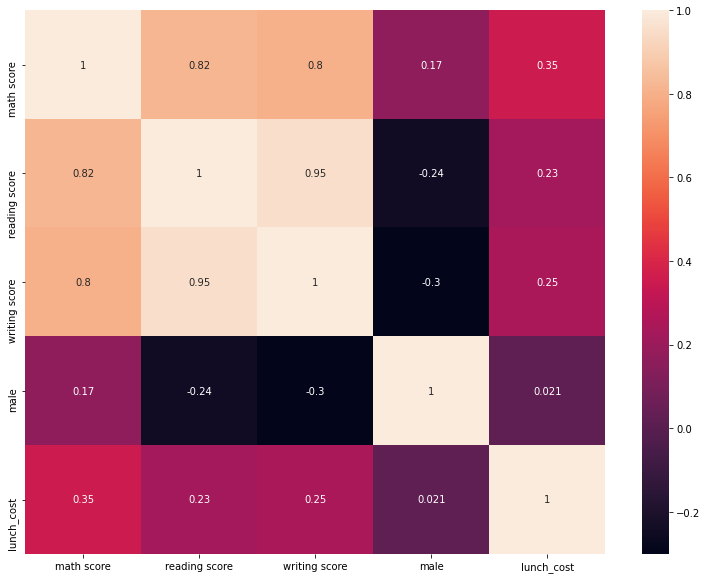

In [13]:
plt.figure(figsize=(13, 10))
sns.heatmap(df_students.corr(), annot = True);

In [ ]:
#much better

In [14]:
df_students.groupby(['test preparation course']).count()

,gender,parental level of education,lunch,math score,reading score,writing score,male,lunch_cost
test preparation course,,,,,,,,
completed,358,358,358,358,358,358,358,358
none,642,642,642,642,642,642,642,642


In [15]:
#we can see there are two types of lunch people so we will also try and make these values numric
df_students['preparation_status'] = df_students['test preparation course'].map({'completed':1 , 'none':0})

df_students.head(5)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,male,lunch_cost,preparation_status
0,female,bachelor's degree,standard,none,72,72,74,0,1,0
1,female,some college,standard,completed,69,90,88,0,1,1
2,female,master's degree,standard,none,90,95,93,0,1,0
3,male,associate's degree,free/reduced,none,47,57,44,1,0,0
4,male,some college,standard,none,76,78,75,1,1,0


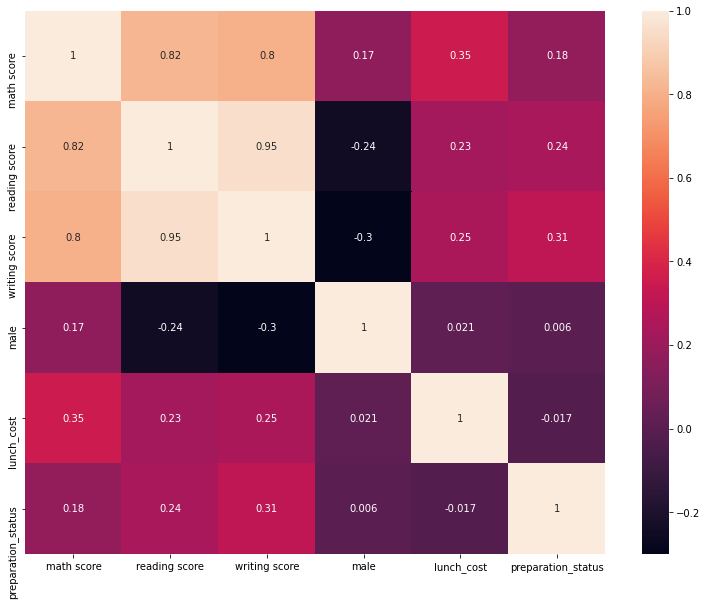

In [16]:
plt.figure(figsize=(13, 10))
sns.heatmap(df_students.corr(), annot = True);

## We have mapped above the lunch, gender and preperation to numric values

In [17]:
df_students.groupby(['parental level of education']).count()

,gender,lunch,test preparation course,math score,reading score,writing score,male,lunch_cost,preparation_status
parental level of education,,,,,,,,,
associate's degree,222,222,222,222,222,222,222,222,222
bachelor's degree,118,118,118,118,118,118,118,118,118
high school,196,196,196,196,196,196,196,196,196
master's degree,59,59,59,59,59,59,59,59,59
some college,226,226,226,226,226,226,226,226,226
some high school,179,179,179,179,179,179,179,179,179


In [19]:
df_students['parents_education'] = df_students['parental level of education'].map({'some high school':1 , 'high school':2, 'some college':3, 'bachelor\'s degree': 4, 'associate\'s degree':5, 'master\'s degree':6})
df_students.head(5)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,male,lunch_cost,preparation_status,parents_education
0,female,bachelor's degree,standard,none,72,72,74,0,1,0,4
1,female,some college,standard,completed,69,90,88,0,1,1,3
2,female,master's degree,standard,none,90,95,93,0,1,0,6
3,male,associate's degree,free/reduced,none,47,57,44,1,0,0,5
4,male,some college,standard,none,76,78,75,1,1,0,3


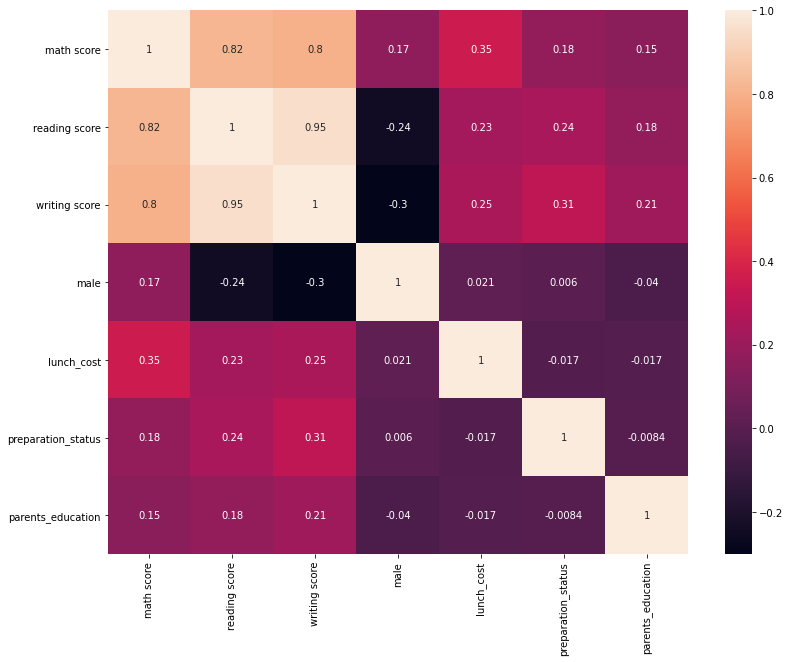

In [20]:
plt.figure(figsize=(13, 10))
sns.heatmap(df_students.corr(), annot = True);

## ***We have mapped above the parent educaion level to 5 numric values***

# well done! we can see all the corrolations above 

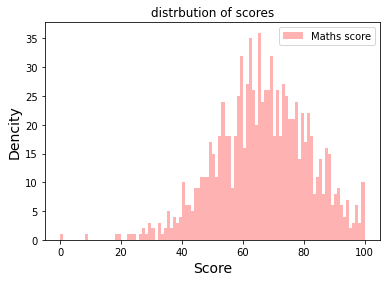

In [36]:
plt.figure(figsize=(6,4))
plt.hist(df_students['math score'], bins=100, alpha=0.3, label="Maths score", facecolor ='r')
plt.xlabel("Score", size=14)
plt.ylabel("Dencity", size=14)
plt.title("distrbution of scores")
plt.legend(loc='upper right')

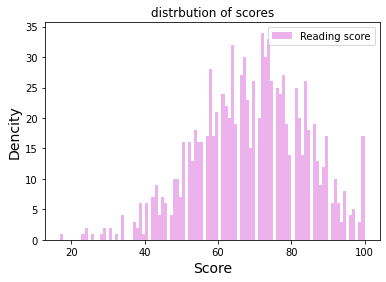

In [37]:
plt.figure(figsize=(6,4))
plt.hist(df_students['reading score'], bins=100, alpha=0.3, label="Reading score", facecolor = 'm')
plt.xlabel("Score", size=14)
plt.ylabel("Dencity", size=14)
plt.title("distrbution of scores")
plt.legend(loc='upper right')


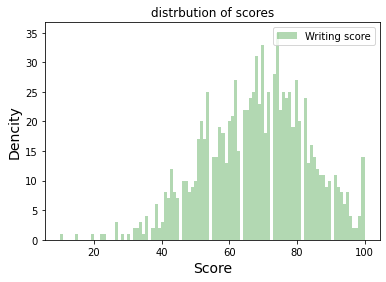

In [38]:
plt.figure(figsize=(6,4))
plt.hist(df_students['writing score'], bins=100, alpha=0.3, label="Writing score", facecolor = 'g')
plt.xlabel("Score", size=14)
plt.ylabel("Dencity", size=14)
plt.title("distrbution of scores")
plt.legend(loc='upper right')


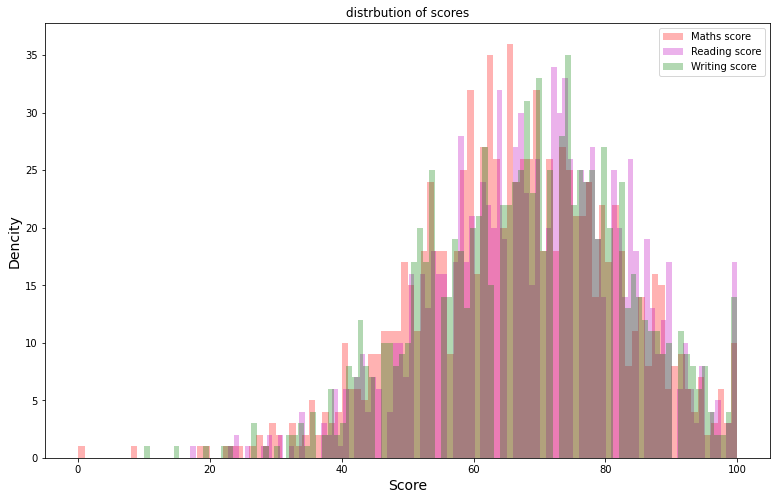

In [34]:
plt.figure(figsize=(13,8))

plt.hist(df_students['math score'], bins=100, alpha=0.3, label="Maths score", facecolor ='r')
plt.hist(df_students['reading score'], bins=100, alpha=0.3, label="Reading score", facecolor = 'm')
plt.hist(df_students['writing score'], bins=100, alpha=0.3, label="Writing score", facecolor = 'g')
plt.xlabel("Score", size=14)
plt.ylabel("Dencity", size=14)
plt.title("distrbution of scores")
plt.legend(loc='upper right')


# ***Above we have shown the distrebution of scores for maths , reading and wrighting as well ass together via histograms***

In [98]:
df_students.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,male,lunch_cost,preparation_status,parents_education
0,female,bachelor's degree,standard,none,72,72,74,0,1,0,4
1,female,some college,standard,completed,69,90,88,0,1,1,3
2,female,master's degree,standard,none,90,95,93,0,1,0,6
3,male,associate's degree,free/reduced,none,47,57,44,1,0,0,5
4,male,some college,standard,none,76,78,75,1,1,0,3


### Above we have double checked our data and have verified our numric changes

In [482]:
X = df_students[['male','parents_education','lunch_cost','preparation_status','math score','reading score']]
y = df_students['writing score']

In [483]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#standard 20 %

In [484]:
from sklearn.linear_model import LinearRegression

In [487]:
modle = LinearRegression()
modle.fit(X_train, y_train)

score = modle.score(X_test, y_test)

print(score)

0.9406657329584662


# Important anaylis

## ***Above we have split our data in to training and testing sets (using the standard 20/80) we have difined a modle of the type liner regresion and fit our modle with our training sets accordingly our

# ***Our model currently predicts with an accuracy score of 94.06% (our model estimates the writing score***

In [516]:
joshua = [[1,6,1,1,90,50]]
print(modle.predict(joshua))
#prediction for me

[62.74843386]


In [512]:
modle.coef_

array([-5.80308447,  0.48442496,  0.19950124,  3.56702319,  0.28326472,
        0.66644189])

### ***above our our modles coef's also known as weights***

## Above is a template of me and our model predicts i would recive a 58.92 in a writing test

# Lets try improve this, lets find the best test size for our model 

In [492]:
lst_max_test_size = []
for i in np.arange(0.1,1,0.05):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state = 0)

    modle = LinearRegression()
    modle.fit(X_train, y_train)

    score = modle.score(X_test, y_test)
    
    lst_max_test_size.append(score)
    


Text(0.5, 1.0, 'accuracy as a function of test size')

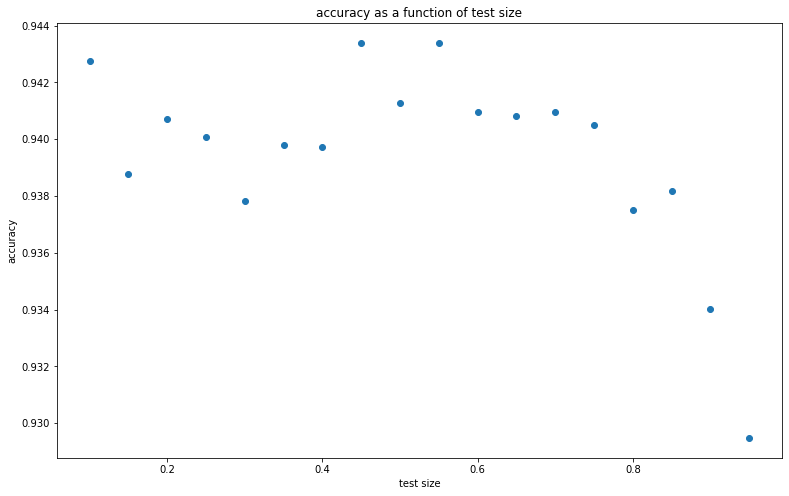

In [493]:
plt.figure(figsize=(13,8))

plt.scatter(np.arange(0.1,1,0.05),lst_max_test_size)
plt.xlabel("test size")
plt.ylabel("accuracy")
plt.title("accuracy as a function of test size")

## ***It seems like at a 45/55 split test we would get the best results , lets try this***

In [529]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state = 0)

modle = LinearRegression()
modle.fit(X_train, y_train)

score = modle.score(X_test, y_test)
    
print(score)

0.9433650350182732


### ***Our modle has improved by around 0.3% but we have compromized and it is better practice to use the 20/80 we shall therefor go back to that as it hass not been worth it***



In [527]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

modle = LinearRegression()
modle.fit(X_train, y_train)

score = modle.score(X_test, y_test)
    
print(score)

0.9406657329584662


# K cross validation

### ***We want to validate that our model will be accurat on data it has not yet seen. One way of doing this is K cross validation where we will split our data randomly in to k amounts of "Folds" usally 5 or 10.***

### ***this gives us a good estimate about the accuracy of our model***

In [530]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(modle, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.95087199, 0.92689943, 0.93610504, 0.93097701, 0.9398508 ])

#### ***Above we have split the data in to 5 k folds and we shall now take the average of these five results wich will be a good estimate of our models accuracy***

In [531]:
scores.mean()

0.9369408537541759

### ***Below we hsall try with 10 k folds***

In [532]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(modle, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.95549459, 0.94156412, 0.94162815, 0.90359663, 0.92146431,
       0.94921883, 0.93596568, 0.92430828, 0.94095249, 0.93765029])

In [533]:
scores.mean()

0.9351843371636098

#### We can see a better indicator would be k = 5 for our folds and we can confirm our modle is reliable with an average of 93.69% accuracy

# The End